# Homework 4

**ÖNEMLİ:** Beyler aşağıda her bölümde yapılması gereken seyleri belirttim. Herkes tamamladığı kısımların üstünü çift tilda (\~~) ile çizerse geriye ne kalmış anlayabiliriz. Ayrıca **OutputTable** adında bir class olusturdum, output table olusturmak icin uzun uzun yazmanıza gerek yok kullanımına BFGS kodundan bakabilirsiniz.

**ÇOK ÖNEMLİ:** Beyler np.array kullanarak listten array olusturdugunuzda shape i yanlıs geliyor ve matrix gibi algılamayıp islemlerde mal oluyor. Bu yüzden array olusturdugunuzda (özellikle x0 ve grad_f icin) np.reshape kullanarak düzgün shape'i vermeyi unutmayın.

Yazıyı okuyanlar isminin üstünü cizebilirse herkes okuyunca bu yazıyı silebiliriz:
*   ~~Sefa~~
*   ~~Yunus~~
*   Harun
*   ~~Akın~~

### TODOs

Steepest Descent:
*   Algorithm code
*   ~~Function 1 - Solution set 1~~
*   ~~Function 1 - Solution set 2~~
*   ~~Function 2 - Solution set 1~~
*   ~~Function 2 - Solution set 2~~

Newton's Method:
*   ~~Algorithm code~~
*   ~~Function 1 - Solution set 1~~
*   ~~Function 1 - Solution set 2~~
*   Function 2 - Solution set 1
*   Function 2 - Solution set 2

DFP:
*   Algorithm code
*   Function 1 - Solution set 1
*   Function 1 - Solution set 2
*   Function 2 - Solution set 1
*   Function 2 - Solution set 2  

BFGS:
*   ~~Algorithm code~~
*   ~~Function 1 - Solution set 1~~
*   Function 1 - Solution set 2
*   Function 2 - Solution set 1
*   Function 2 - Solution set 2

In [1]:
import pandas as pd
import numpy as np
from sympy import Symbol, lambdify

In [2]:
x1 = Symbol("x1")
x2 = Symbol("x2")

func1 = (5*x1 - x2)**4 + (x1 - 2)**2 + x1 - 2*x2 + 12
func2 = 100*(x2 - x1**2)**2 + (1 - x1)**2 


f1 = lambdify([[x1,x2]], func1, "numpy")
f2 = lambdify([[x1,x2]], func2, "numpy")

gf1 = lambdify([[x1,x2]], func1.diff([[x1, x2]]), "numpy")
gf2 = lambdify([[x1,x2]], func2.diff([[x1, x2]]), "numpy")

grad_f1 = lambda x_arr : np.array(gf1(x_arr)).reshape(1,2)
grad_f2 = lambda x_arr : np.array(gf2(x_arr)).reshape(1,2)

f1_hessian = lambdify([[x1,x2]], (func1.diff([[x1, x2]])).diff([[x1, x2]]), "numpy")
f2_hessian = lambdify([[x1,x2]], (func2.diff([[x1, x2]])).diff([[x1, x2]]), "numpy")

grad_f1_hessian= lambda x_arr : np.array(f1_hessian(x_arr)).reshape(2,2)
grad_f2_hessian= lambda x_arr : np.array(f2_hessian(x_arr)).reshape(2,2)

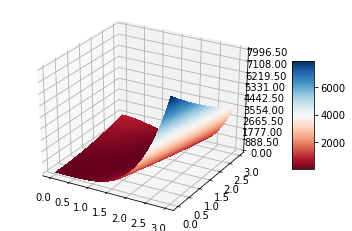

In [266]:
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

# plot the function
x = np.arange(0,3,0.01)
y = np.arange(0,3,0.01)
X,Y = meshgrid(x, y) # grid of point
Z = f2([X,Y]) # evaluation of the function on the grid

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.savefig("graph.png")
plt.show()

###### YUNUS-- Notes

In [209]:
x_0=[1,0]
xk = np.array(x_0).reshape(2,1)
func2.diff([[x1, x2]])
a=np.asarray(f2_hessian(x_0))
d_k=-np.linalg.inv(a)@np.transpose(np.asarray(gf2(x_0)).reshape(1,2))

xkp2=[x + y for x, y in zip(x_0,(alpha_k*d_k).flatten().tolist() )]
gf2(x_0),func2.diff([[x1, x2]]),np.linalg.norm(gf2(x_0))

([400, -200],
 [-400*x1*(-x1**2 + x2) + 2*x1 - 2, -200*x1**2 + 200*x2],
 447.21359549995793)

In [323]:
x_0=[0.1556396484375, 0.0]

d_k_2=-H@np.transpose(np.asarray(gf2(x_0)).reshape(1,2))
alpha_k=ExactLineSearch(f2,np.array(x_0).reshape(2,1),d_k_2)
xkp2=[x + y for x, y in zip(x_0,(alpha_k*d_k_2).flatten().tolist() )]
d_k_2

array([[0.18065343],
       [4.84474003]])

In [303]:
x_0=[0,0]
H = np.identity(len(x_0))
H

array([[1., 0.],
       [0., 1.]])

### Useful Functions

In [3]:
def np_str(x_k):
    '''
    Used to convert numpy array to string with determined format
    '''
    return np.array2string(x_k.reshape(len(x_k)), precision=3, separator=',')

In [4]:
class OutputTable:
    def __init__(self):
        self.table = pd.DataFrame([],columns=['k', 'x^k', 'f(x^k)', 'd^k', 'a^k', 'x^k+1'])
    def add_row(self, k, xk, fxk, dk, ak, xkp):
        self.table.loc[len(self.table)] = [k, np_str(xk), np.asscalar(fxk), np_str(dk), ak, np_str(xkp)]
    def print_latex():
        print(self.table.to_latex(index=False))

### Exact Line Search

In [7]:
def BisectionMethod(f, a=-100,b=100,epsilon=0.0000000001) :
    iteration=0
    while (b - a) >= epsilon:
        x_1 = (a + b) / 2
        fx_1 = f(x_1)
        if f(x_1 + epsilon) <= fx_1:
            a = x_1
        else:
            b = x_1
        iteration+=1
    x_star = (a+b)/2
    return x_star

def ExactLineSearch(f, x0, d):
    alpha = Symbol('alpha')
    function_alpha = f(np.array(x0)+alpha*np.array(d))
    f_alp = lambdify(alpha, function_alpha, 'numpy')
    alp_star = BisectionMethod(f_alp)
    return alp_star

## Steepest Descent Method

In [8]:
def steepestDescentMethod(f, grad_f, x_0, epsilon):
    xk = np.array(x_0).reshape(2,1)
    k = 0
    stop = False
    output = OutputTable()
    while(stop == False):
        d = - np.transpose(grad_f(xk))
        if(np.linalg.norm(d) < epsilon):
            stop = True
        else:
            a = ExactLineSearch(f,xk,d)
            xkp = xk + a*d
            output.add_row(k, xk, f(xk), d, a, xkp)
            k += 1
            xk = xkp
    output.add_row(k,xk,f(xk),d,None,np.array([]))
    return xk, np.asscalar(f(xk)), output

In [9]:
xs1, fs1, outputs1 = steepestDescentMethod(f1, grad_f1, [10,10], 0.001)
xs1, fs1

(array([[ 6.50126698],
        [33.3001018 ]]), -27.44054916708624)

In [10]:
print(outputs1.table.to_latex(index=False))

\begin{tabular}{llllll}
\toprule
  k &              x\textasciicircum k &   f(x\textasciicircum k) &                      d\textasciicircum k &          a\textasciicircum k &            x\textasciicircum k+1 \\
\midrule
  0 &          [10,10] &  2560066 &      [-1280017,  256002] &  6.07647e-06 &  [ 2.222,11.556] \\
  1 &  [ 2.222,11.556] & -8.80048 &            [0.325,1.646] &      13.2118 &  [ 6.51 ,33.306] \\
  2 &  [ 6.51 ,33.306] & -27.4356 &          [-1.333, 0.263] &   0.00527333 &  [ 6.503,33.307] \\
  3 &  [ 6.503,33.307] & -27.4405 &          [-0.   ,-0.001] &     -14.4792 &  [ 6.506,33.323] \\
  4 &  [ 6.506,33.323] & -27.4405 &          [-0.001,-0.002] &     0.271505 &  [ 6.505,33.322] \\
  5 &  [ 6.505,33.322] & -27.4405 &          [ 0.029,-0.008] &   0.00494709 &  [ 6.506,33.322] \\
  6 &  [ 6.506,33.322] & -27.4405 &  [ 6.406e-05,-2.249e-03] &     0.571153 &  [ 6.506,33.321] \\
  7 &  [ 6.506,33.321] & -27.4405 &          [-0.055, 0.009] &   0.00505372 &  [ 6.505,33.321]

In [11]:
xs2, fs2, outputs2 = steepestDescentMethod(f1, grad_f1, [-25,-15], 0.001)
xs2, fs2

(array([[ 6.50029675],
        [33.29519929]]), -27.44055070006383)

In [12]:
print(outputs2.table.to_latex(index=False))

\begin{tabular}{llllll}
\toprule
  k &                x\textasciicircum k &     f(x\textasciicircum k) &                      d\textasciicircum k &         a\textasciicircum k &              x\textasciicircum k+1 \\
\midrule
  0 &          [-25,-15] &  146410746 &      [26620053,-5323998] &  8.0031e-07 &  [ -3.696,-19.261] \\
  1 &  [ -3.696,-19.261] &    79.6416 &            [0.816,3.915] &     7.81757 &    [ 2.684,11.345] \\
  2 &    [ 2.684,11.345] &    10.9678 &      [-180.825,  37.691] &  0.00267321 &    [ 2.201,11.446] \\
  3 &    [ 2.201,11.446] &   -8.61301 &            [0.344,1.651] &     11.8403 &    [ 6.275,30.994] \\
  4 &    [ 6.275,30.994] &   -25.4153 &        [-10.661,  2.222] &   0.0207447 &    [ 6.054,31.04 ] \\
  5 &    [ 6.054,31.04 ] &   -27.2396 &            [0.036,0.171] &     10.6039 &    [ 6.433,32.856] \\
  6 &    [ 6.433,32.856] &   -27.4012 &          [-3.191, 0.665] &  0.00575807 &    [ 6.414,32.86 ] \\
  7 &    [ 6.414,32.86 ] &   -27.4331 &            [0.

In [13]:
xs3, fs3, outputs3 = steepestDescentMethod(f2, grad_f2, [2,-4], 0.01)
xs3, fs3

(array([[0.98919279],
        [0.97845388]]), 0.00011703096941784185)

In [14]:
print(outputs3.table.to_latex(index=False))

\begin{tabular}{llllll}
\toprule
  k &              x\textasciicircum k &       f(x\textasciicircum k) &                d\textasciicircum k &         a\textasciicircum k &            x\textasciicircum k+1 \\
\midrule
  0 &          [ 2,-4] &         6401 &      [-6402, 1600] &  0.00033167 &  [-0.123,-3.469] \\
  1 &  [-0.123,-3.469] &      1215.47 &  [174.172,696.909] &  0.00637716 &    [0.987,0.975] \\
  2 &    [0.987,0.975] &   0.00015976 &    [ 0.05 ,-0.012] &  0.00107117 &    [0.987,0.975] \\
  3 &    [0.987,0.975] &  0.000158347 &      [0.003,0.011] &   0.0206554 &    [0.987,0.975] \\
  4 &    [0.987,0.975] &  0.000156945 &    [ 0.049,-0.012] &  0.00107097 &    [0.988,0.975] \\
  5 &    [0.988,0.975] &  0.000155556 &      [0.003,0.011] &   0.0206606 &    [0.988,0.975] \\
  6 &    [0.988,0.975] &   0.00015418 &    [ 0.049,-0.012] &  0.00107075 &    [0.988,0.975] \\
  7 &    [0.988,0.975] &  0.000152815 &      [0.003,0.011] &   0.0206664 &    [0.988,0.976] \\
  8 &    [0.988,0.976] 

In [15]:
xs4, fs4, outputs4 = steepestDescentMethod(f2, grad_f2, [-2,-3.5], 0.002)
xs4, fs4

(array([[1.0017008 ],
        [1.00341419]]), 2.9021216234617857e-06)

In [16]:
outputs4.table

,k,x^k,f(x^k),d^k,a^k,x^k+1
0,0,"[-2. ,-3.5]",5634.000000,"[6006.,1500.]",0.000354036,"[ 0.126,-2.969]"
1,1,"[ 0.126,-2.969]",891.730769,"[-149.096, 596.982]",0.00591938,"[-0.756, 0.565]"
2,2,"[-0.756, 0.565]",3.089270,"[5.645,1.41 ]",0.311481,"[1.002,1.004]"
3,3,"[1.002,1.004]",0.000004,"[ 0.001,-0.002]",0.00235886,"[1.002,1.004]"
4,4,"[1.002,1.004]",0.000004,"[-0.003,-0.001]",0.00172039,"[1.002,1.004]"
...,...,...,...,...,...,...
169,169,"[1.002,1.003]",0.000003,"[ 0. ,-0.002]",0.00236421,"[1.002,1.003]"
170,170,"[1.002,1.003]",0.000003,"[-0.002,-0.001]",0.00171868,"[1.002,1.003]"
171,171,"[1.002,1.003]",0.000003,"[ 0. ,-0.002]",0.00236575,"[1.002,1.003]"
172,172,"[1.002,1.003]",0.000003,"[-0.002,-0.001]",0.00171961,"[1.002,1.003]"


## Newton's Method

In [359]:
def NewtonsMethod(x_0,epsilon,f,grad_f,Hessian_f):
    xk = np.array(x_0).reshape(2,1)
    k=0
    output = OutputTable()
    while(True):
        d_k=-np.linalg.inv(Hessian_f(xk))@np.transpose(grad_f(xk))
        alpha_k=ExactLineSearch(f,xk,d_k)
        xkp=xk+alpha_k*d_k
        if(np.linalg.norm(grad_f(xk)) < epsilon):
            break
        output.add_row(k, xk, f(xk), d_k, alpha_k, xkp)
        xk = xkp
        k += 1
    output.add_row(k,xk,f(xk),d_k,None,np.array([]))    
    return xk, np.asscalar(f(xk)), output

In [337]:
def NewtonsMethod_vol2(x_0,epsilon,f,grad_f,Hessian_f):
    xk = x_0
    k=0
    H = np.identity(len(x_0))
    output = OutputTable()
    while(True):
        #print(xk)
        a=np.asarray(Hessian_f(xk))
        #print(a)
        #d_k=-np.linalg.inv(a)@np.transpose(np.asarray(grad_f(xk)).reshape(1,2))
        d_k=-np.linalg.inv(a)@np.transpose(np.asarray(gf2(xk)).reshape(1,2))
        alpha_k=ExactLineSearch(f,np.array(xk).reshape(2,1),d_k)
        xkp=[x + y for x, y in zip(x_0,(alpha_k*d_k).flatten().tolist() )]
        #print(xkp)
        print(np.linalg.norm(np.asarray(grad_f(xk)).reshape(1,2)))
        if(np.linalg.norm(np.asarray(grad_f(xk)).reshape(1,2)) < epsilon):
            break
        #output.add_row(k, np.array(xk), f(np.array(xk)), d_k, alpha_k, np.array(xkp))
        xk= xkp
        k += 1
        
    #output.add_row(k,np.array(xk),f(np.array(xk)),d_k,None,np.array([]))    
    return (xk)



In [363]:
x_f1_s1,f1_s1, outputf1_1 = NewtonsMethod([0,1], 0.001,f1,grad_f1,grad_f1_hessian)
outputf1_1.table

,k,x^k,f(x^k),d^k,a^k,x^k+1
0,0,"[0,1]",15,"[ 6.5 ,32.333]",0.999451,"[ 6.496,33.316]"
1,1,"[ 6.496,33.316]",-27.4344,"[ 0.004,-0.02 ]",1.04523,"[ 6.5 ,33.295]"
2,2,"[ 6.5 ,33.295]",-27.4406,"[-0. ,-0.001]",0.996399,"[ 6.5 ,33.294]"
3,3,"[ 6.5 ,33.294]",-27.4406,"[-5.815e-07,-3.480e-06]",None,[]


In [362]:
x_f1_s2,f1_s2, outputf1_2 = NewtonsMethod([-25,75], 0.001,f1,grad_f1,grad_f1_hessian)
outputf1_2.table

,k,x^k,f(x^k),d^k,a^k,x^k+1
0,0,"[-25, 75]",1600000566,"[31.5 ,90.833]",2.96173,"[ 68.295,344.024]"
1,1,"[ 68.295,344.024]",3829.58,"[ -61.795,-309.797]",0.999451,"[ 6.534,34.397]"
2,2,"[ 6.534,34.397]",-20.809,"[-0.034,-0.689]",1.79291,"[ 6.473,33.16 ]"
3,3,"[ 6.473,33.16 ]",-27.4398,"[0.027,0.133]",0.996399,"[ 6.5 ,33.293]"
4,4,"[ 6.5 ,33.293]",-27.4406,"[9.692e-05,4.775e-04]",None,[]


In [343]:
NewtonsMethod_vol2([0,7], 1,f2,gf2,f2_hessian)

1400.0014285706998
5.421507616052031
1574.2094829029727
13.747184172367716
1399.016261468056
16.545003209362118
1393.6409770647901
19.927521555228726
1387.6791045236866
23.779080585778008
1381.7913547825126
27.906798230597055
1376.2083293304083
32.23671157642011
1370.9069466701976
36.64866003698083
1365.8114155443495
41.12844956980344
1360.8786545683454
45.6160295602684
1356.0244658104764
50.14717255454303
1351.1723231996457
54.754259581129965
1346.427943595925
59.30132246796343
1341.783341234095
63.79202581527665
1337.0318667226472
68.4232078148937
1332.3345771328793
73.0146843785931
1327.6930587136735
77.56797854938522
1323.1018057487029
82.0842997034583
1318.5567845996643
86.56463367621303
1314.054960492404
91.00980309338294
1309.593994453477
95.42050892717144
1305.1720434959698
99.79735978623002
1300.787625465962
104.14089298312085
1296.439525537432
108.45158996333367
1292.126730208178
112.72988778894737
1287.8483798615875
116.97618781118555
1283.6037341136634
121.19086230707966
12

838.6434796738614
564.3780429310851
837.6554761376794
565.362472830631
836.6745785034631
566.3398226687948
835.7007356538019
567.3101433743244
834.7338968392614
568.2734855094149
833.7740116757292
569.2298992723508
832.8210301417768
570.1794345001313
831.874902576044
571.1221406710756
830.9355796746398
572.0580669074088
830.0030124885641
572.9872619778301
829.0771524211474
573.9097743000617
828.1579512255081
574.8256519433784
827.2453610020302
575.7349426311213
826.3393341958576
576.6376937431897
825.4398235944093
577.5339523185186
824.5467823249086
578.423765057535
823.6601638519342
579.3071783245997
822.7799219749855
580.1842381504277
821.9060108260701
581.054990234494
821.0383848673038
581.9194799474203
820.1769988885321
582.7777523333456
819.3218080049668
583.6298521122787
818.4727676548392
584.4758236824338
817.6298335970736
585.3157111225494
816.7929619089731
586.1495581941903
815.9621089839267
586.9774083440333
815.1372315291295
587.7993047061358
814.3182865633216
588.6152901041

675.2365135429474
727.1954698357754
675.4236819469199
727.0089752158011
675.6095043277392
726.8238217766248
675.7939903653842
726.639999873046
675.977149670218
726.4574999292302
676.1589917834903
726.2763124382083
676.3395261778334
726.0964279613836
676.5187622577553
725.9178371280387
676.6967093601309
725.7405306348476
676.8733767546878
725.5644992453902
677.0487736444885
725.3897337896732
677.2229091664115
725.21622516365
677.3957923916254
725.0439643287482
677.5674323260629
724.8729423113975
677.7378379108894
724.7031502025628
677.9070180229688
724.5345791572801
678.0749814753261
724.3672203941952
678.2417370176062
724.2010651951073
678.4072933365304
724.0361049045127
678.5716590563479
723.8723309291568
678.7348427392861
723.7097347375835
678.8968528859965
723.5483078596932
679.0576979359967
723.3880418862994
679.2173862681108
723.2289284686926
679.3759262009058
723.0709593182036
679.5333259931252
722.9141262057727
679.6895938441185
722.758420961521
679.8447378942692
722.60383547432

696.4551534064078
706.053234857574
696.4897279597193
706.0187848349652
696.5240538702653
705.984582559667
696.5581329261595
705.9506262500037
696.5919669026562
705.916914137113
696.6255575622425
705.8834444648538
696.6589066547313
705.8502154897134
696.692015917351
705.8172254807181
696.7248870748376
705.7844727193424
696.757521839523
705.7519554994195
696.7899219114252
705.7196721270527
696.8220889783361
705.6876209205268
696.8540247159102
705.6558002102211
696.8857307877518
705.6242083385215
696.9172088455006
705.5928436597347
696.948460528919
705.5617045400027
696.9794874659773
705.5307893572173
697.0102912729377
705.5000965009355
697.0408735544397
705.4696243722957
697.0712359035826
705.439371383935
697.1013799020092
705.4093359599058
697.1313071199875
705.379516535594
697.1610191164931
705.3499115576373
697.1905174392906
705.3205194838444
697.2198036250137
705.2913387831147
697.2488791992449
705.2623679353588
697.277745676596
705.2336054314187
697.3064045607865
705.2050497729899
6

KeyboardInterrupt: 

## DFP

In [28]:
def DFP(f, grad_f, x_0, epsilon):
    xk = np.array(x_0).reshape(2,1)
    k = 0
    H = np.identity(len(x_0))
    stop = False
    output = OutputTable()
    while(stop == False):
        d = -H @ np.transpose(grad_f(xk))
        if(np.linalg.norm(d) < epsilon):
            stop = True
        else:
            a = ExactLineSearch(f,xk,d)
            xkp = xk + a*d
            p = xkp - xk
            q = np.transpose(grad_f(xkp)) - np.transpose(grad_f(xk))
            A = (p @ np.transpose(p)) / (p.transpose() @ q)
            B = - (H @ q @ np.transpose( H @ q)) / (q.transpose() @ H @ q)
            Hkp = H + A + B
            output.add_row(k, xk, f(xk), d, a, xkp)
            k += 1
            xk = xkp
            H = Hkp
    output.add_row(k,xk,f(xk),d,None,np.array([]))
    return xk, np.asscalar(f(xk)), output

In [29]:
xs1, fs1, output1 = DFP(f1, grad_f1, [0,0], 0.001)
xs1, fs1

(array([[ 6.50004193],
        [33.29392539]]), -27.44055078634222)

In [30]:
output1.table

,k,x^k,f(x^k),d^k,a^k,x^k+1
0,0,"[0,0]",16,"[3.,2.]",0.0442505,"[0.133,0.089]"
1,1,"[0.133,0.089]",15.5519,"[0.491,2.493]",13.1149,"[ 6.575,32.79 ]"
2,2,"[ 6.575,32.79 ]",-26.0735,"[-0.057, 0.706]",0.883484,"[ 6.524,33.414]"
3,3,"[ 6.524,33.414]",-27.44,"[-0.024,-0.117]",0.898743,"[ 6.502,33.309]"
4,4,"[ 6.502,33.309]",-27.4405,"[-0.006,-0.038]",0.395203,"[ 6.5 ,33.294]"
5,5,"[ 6.5 ,33.294]",-27.4406,"[-4.193e-05,-2.248e-04]",None,[]


Akin kardesime selam olsun. 4. Katta bulusmak uzere...
                                Sevgiler
                                 Harun

## BFGS

In [21]:
def BFGS(f, grad_f, x_0, epsilon):
    xk = np.array(x_0).reshape(2,1)
    k = 0
    H = np.identity(len(x_0))
    stop = False
    output = OutputTable()
    while(stop == False):
        d = -H @ np.transpose(grad_f(xk))
        if(np.linalg.norm(d) < epsilon):
            stop = True
        if(k == -1):
            break
        else:
            a = ExactLineSearch(f,xk,d)
            xkp = xk + a*d
            p = xkp - xk
            q = np.transpose(grad_f(xkp)) - np.transpose(grad_f(xk))
            A = ((1+ np.transpose(q) @ H @ q) / (np.transpose(q) @ p)) * (p @ np.transpose(p)) / (np.transpose(p) @ q)
            B = - (p @ np.transpose(q) @ H + H @ q @ np.transpose(p)) / (np.transpose(q) @ p)
            Hkp = H + A + B
            output.add_row(k, xk, f(xk), d, a, xkp)
            k += 1
            xk = xkp
            H = Hkp
    output.add_row(k,xk,f(xk),d,None,np.array([]))
    return xk, np.asscalar(f(xk)), output


In [22]:
xs1, fs1, output1 = BFGS(f1, grad_f1, [0,0], 0.001)
xs1, fs1

(array([[ 6.4995995 ],
        [33.29213559]]), -27.44054990454422)

In [23]:
output1.table

,k,x^k,f(x^k),d^k,a^k,x^k+1
0,0,"[0,0]",16,"[3.,2.]",0.0442505,"[0.133,0.089]"
1,1,"[0.133,0.089]",15.5519,"[0.963,4.868]",6.66656,"[ 6.553,32.54 ]"
2,2,"[ 6.553,32.54 ]",-25.7982,"[-0.173, 2.234]",0.325012,"[ 6.496,33.266]"
3,3,"[ 6.496,33.266]",-27.4402,"[-0.001, 0.014]",0.520325,"[ 6.496,33.273]"
4,4,"[ 6.496,33.273]",-27.4405,"[-0.005, 0.067]",-0.00152588,"[ 6.496,33.273]"
5,5,"[ 6.496,33.273]",-27.4405,"[ -71.486,1029.42 ]",-0.00152588,"[ 6.605,31.702]"
6,6,"[ 6.605,31.702]",-20.5324,"[-0.005, 0.066]",23.8388,"[ 6.497,33.279]"
7,7,"[ 6.497,33.279]",-27.4405,"[3.545e-05,1.858e-04]",71.0648,"[ 6.5 ,33.292]"
8,8,"[ 6.5 ,33.292]",-27.4405,"[3.545e-05,1.858e-04]",None,[]


In [24]:
xs2, fs2, output2 = BFGS(f1, grad_f1, [10,10], 0.001)
xs2, fs2

(array([[ -615682.95451531],
        [-3077907.80209916]]), 445132303112.5189)

In [25]:
output2.table

,k,x^k,f(x^k),d^k,a^k,x^k+1
0,0,"[10,10]",2560066,"[-1280017., 256002.]",-0.00152588,"[1963.151,-380.628]"
1,1,"[1963.151,-380.628]",1.0809e+16,"[-0.27 ,-1.346]",99.9985,"[1936.113,-515.196]"
2,2,"[1936.113,-515.196]",1.08063e+16,"[11204.828,56024.005]",-99.9985,"[-1118529.603,-5602830.199]"
3,3,"[-1118529.603,-5602830.199]",1.07502e+16,"[152481.149,762452.782]",99.9985,"[14129352.638,70641284.582]"
4,4,"[14129352.638,70641284.582]",1.10055e+15,"[ -4975.245,-24876.173]",99.9985,"[13631835.74 ,68153705.264]"
5,5,"[13631835.74 ,68153705.264]",1.08334e+15,"[15.742,78.718]",99.9985,"[13633409.883,68161576.963]"
6,6,"[13633409.883,68161576.963]",1.08274e+15,"[-0.203,-1.016]",99.9985,"[13633389.563,68161475.364]"
7,7,"[13633389.563,68161475.364]",1.08273e+15,"[ -20618.895,-103093.78 ]",99.9985,"[11571531.546,57852254.692]"
8,8,"[11571531.546,57852254.692]",9.86121e+14,"[0.029,0.147]",99.9985,"[11571534.465,57852269.344]"
9,9,"[11571534.465,57852269.344]",9.86086e+14,"[0.077,0.389]",99.9985,"[11571542.211,57852308.238]"


In [238]:
xs3, fs3, output3 = BFGS(f2, grad_f2, [0,0], 0.001)
xs3, fs3

(array([[ 10.3087146 ],
        [106.28439447]]), 86.67406483533888)

In [239]:
output3.table

,k,x^k,f(x^k),d^k,a^k,x^k+1
0,0,"[0,0]",1,"[2.,0.]",0.0778198,"[0.156,0. ]"
1,1,"[0.156,0. ]",0.771623,"[14.237, 5.326]",0.00762939,"[0.264,0.041]"
2,2,"[0.264,0.041]",0.626576,"[0.466,0.438]",0.779724,"[0.627,0.382]"
3,3,"[0.627,0.382]",0.151823,"[-0.36 , 0.052]",3.83759,"[-0.754, 0.582]"
4,4,"[-0.754, 0.582]",3.09615,"[-0.967,-0.186]",0.00152588,"[-0.755, 0.582]"
5,5,"[-0.755, 0.582]",3.09466,"[-0.777,-0.211]",-2.3056,"[1.036,1.069]"
6,6,"[1.036,1.069]",0.00262663,"[-4.95 ,-1.609]",-0.00152588,"[1.043,1.071]"
7,7,"[1.043,1.071]",0.0305442,"[-0.275,-0.09 ]",6.32477,"[-0.699, 0.499]"
8,8,"[-0.699, 0.499]",2.89796,"[-0.065,-0.087]",0.0198364,"[-0.701, 0.497]"
9,9,"[-0.701, 0.497]",2.89633,"[-0.068,-0.127]",0.00457764,"[-0.701, 0.497]"


In [240]:
xs4, fs4, output4 = BFGS(f2, grad_f2, [5,5], 0.001)
xs4, fs4

(array([[66.26186956],
        [27.35226086]]), 1903828197.1174762)

In [241]:
output4.table

,k,x^k,f(x^k),d^k,a^k,x^k+1
0,0,"[5,5]",40016,"[-40008., 4000.]",-0.00152588,"[66.047,-1.104]"
1,1,"[66.047,-1.104]",1.90389e+09,"[ 28.116,3729.756]",0.00762939,"[66.262,27.352]"
2,2,"[66.262,27.352]",1.90383e+09,"[8.292e-07,1.108e-04]",None,[]


In [345]:
from scipy.optimize import minimize

In [354]:
minimize(fun=f1, x0=[0,0], method='BFGS', tol=0.005)


      fun: -27.440550788387824
 hess_inv: array([[ 0.47354836,  2.36296605],
       [ 2.36296605, 11.92423175]])
      jac: array([-3.86714935e-04,  7.15255737e-05])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 11
     njev: 16
   status: 0
  success: True
        x: array([ 6.49998414, 33.29363065])